# Term Frequencies for talks by gender

In previous notebooks, we have used speakers' genders to apply a gender label to each talk. The gender labels used are: male, female, and not one gender. We note that the list of speakers in the corpus of TED talks identify on the gender binary, at least in the public facing documents about them (which include their TED talk bios and third party websites and publicity). 

## Summary

In this notebook, we will create document-term-frequencies for each set of gendered talks. This notebook follows closely the term-frequency notebook for the full corpus (`01-Terms.ipynb`). We will take each subset separately, annotating the full procedure for just for one of the three subsets. 

Similarly to `01-Terms.ipynb`, the primary task of this notebook is to count the words in the texts of each gender subset. To do so, we also must address the matter of parentheticals head on. Much of this work occurs in a separate notebook, and the explanations of how that work relates to this process is detailed in `01-Terms.ipynb`.

In this notebook, we will take each subset individually (talks labeled male, female, and not one gender) and complete the following procedure: 
* Remove the parentheticals
* Create term matrix from the resulting vocabulary
* Adjust the threshold for a word to be included in the term-matrix
* Export the resulting as a CSV


### Loading necessary packages and functions


In [1]:
import numpy as np

In [2]:
# IMPORTS

import pandas as pd, re, csv, nltk
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

# LOCAL FUNCTION --> Explained in 01-Terms.ipynb

parentheticals = [ "\(laughter\)", "\(applause\)", "\(music\)", "\(video\)", 
                  "\(laughs\)", "\(applause ends\)", "\(audio\)", "\(singing\)", 
                  "\(music ends\)", "\(cheers\)", "\(cheering\)", "\(recording\)", 
                  "\(beatboxing\)", "\(audience\)", "\(guitar strum\)", 
                  "\(clicks metronome\)", "\(sighs\)", "\(guitar\)", "\(marimba sounds\)", 
                  "\(drum sounds\)" ]

def remove_parentheticals(text):
    global parentheticals
    new_text = text
    for rgx_match in parentheticals:
        new_text = re.sub(rgx_match, ' ', new_text.lower(), flags=re.IGNORECASE)
    return new_text

## Talks labeled Female

In this section, we will expand on the four step laid out in the summary above for the talks labeled as "female." This labelling was applied to talks where all the speakers identified with female pronouns. 

We begin by loading the female-labeled talks and taking a peak at the first 5 rows: 

In [3]:
# DATA
talks_female = pd.read_csv('talks_female.csv', index_col='Talk_ID') # Skipping `index_col='Talk_ID'`
talks_female.shape

(260, 14)

In [4]:
talks_female.head()

,public_url,headline,description,event,duration,published,tags,views,text,speaker_1,speaker_2,speaker_3,speaker_4,talk_gender
Talk_ID,,,,,,,,,,,,,,
53,https://www.ted.com/talks/majora_carter_s_tale...,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",TED2006,0:18:36,6/27/06,"MacArthur grant,cities,green,activism,politics...",2000421,If you're here today — and I'm very happy th...,Majora Carter,NaN,NaN,NaN,female
86,https://www.ted.com/talks/julia_sweeney_on_let...,Letting go of God,When two young Mormon missionaries knock on Ju...,TED2006,0:16:32,7/10/06,"atheism,Christianity,religion,God,comedy,humor...",3903747,"On September 10, the morning of my seventh b...",Julia Sweeney,NaN,NaN,NaN,female
55,https://www.ted.com/talks/jehane_noujaim_inspi...,My wish: A global day of film,Jehane Noujaim unveils her 2006 TED Prize wish...,TED2006,0:25:38,7/25/06,"TED Prize,peace,entertainment,movies,global is...",409921,I can't help but this wish: to think about w...,Jehane Noujaim,NaN,NaN,NaN,female
46,https://www.ted.com/talks/jennifer_lin_improvs...,"Improvising on piano, aged 14",Pianist and composer Jennifer Lin gives a magi...,TED2004,0:24:05,8/8/06,"wunderkind,entertainment,piano,creativity,musi...",1680398,(Music) (Music ends) (Applause) Tha...,Jennifer Lin,NaN,NaN,NaN,female
45,https://www.ted.com/talks/sirena_huang_dazzles...,An 11-year-old's magical violin,Violinist Sirena Huang gives a technically bri...,TED2006,0:24:41,8/8/06,"violin,wunderkind,entertainment,youth,music,pe...",2811646,(Music) (Music ends) (Applause) (Ap...,Sirena Huang,NaN,NaN,NaN,female


## Raw Frequencies

In this notebook, we are only concerned with the texts of each TED talk. Therefore, we begin by creating a new data object that only has the texts of the talks themselves. To uniquely identify each talk, we will also create a second data object that lists the talk IDs in the same order as the talks' texts. The talk ID is unique for each talk and will allow for results from this notebook to be tied to the metadata about each talk (which are stored in another file). 

In [5]:
f_texts = talks_female.text.tolist()

**Nota bene**: If you are using this notebook to re-create the basic TF matrix you can stop here and jump to the end of this notebook.

There are a number of ways to get term frequencies, but **SciKit-Learn**'s `CountVectorizer` offers a one-stop shop for generating a DTM from which we can examine words as well as generate BoW-products like topic models. This is made possible by the interoperability between `CountVectorizer` and the other vectorizers and models available in `sklearn`.



In our first experiment, we run `CountVectorizer` unadorned. The default options are: lowercase everything, get rid of all punctuation, make a word out of anything more than two characters long. The only thing that might not be welcome is the splitting of contractions. For now, we will leave things as they are. (Also, please note, no stopwords were used, so we have an unfiltered word list and no pre-processing of the texts is done.)

CHECK THIS ASSERTION: Since `CountVectorizer` only counts when *fitting* and does not engage in any kind of normalization or centering, *transforming*, there is no need to break the two functionalities out in the code that follows.

In [6]:
# If you want to pass options, pass them here:
vectorizer = CountVectorizer( lowercase = True )

# fit the model to the data 
# vecs = vectorizer.fit(texts)
X = vectorizer.fit_transform(f_texts)

# see how many features we have
X.shape

(260, 20990)

In [7]:
X

<260x20990 sparse matrix of type '<class 'numpy.int64'>'
	with 148171 stored elements in Compressed Sparse Row format>

20,990 tokens (or words) is our raw, unfiltered, no pre-processing baseline. It includes, as we will see, a number of artifacts of the TED transcription process, including a variety of ways to spell out *ah*, the use of numerals for a host of things -- from dates to counts and everything in between, and some things which actually take places outside the talk itself, like audience laughter, which we here term *parentheticals*. (Accounting for all these artifacts requires a number of closer inspections, which take place in a separate notebook: [Term Artifacts](Terms-02).)

In [8]:
raw_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

raw_df.shape



(260, 20990)

In [9]:
# Did hand checking to figure out where the first words are: 
# So at least our first 344 "words" are numbers

raw_df.iloc[1:5,343]


1    0
2    0
3    0
4    0
Name: 999, dtype: int64

In [10]:
raw_df.iloc[1:5,344]

# The 345th term is syntax

1    0
2    0
3    0
4    0
Name: ______, dtype: int64

In [11]:
raw_df.iloc[1:5,345]

# not a word, but also not a number "a10"

1    0
2    0
3    0
4    0
Name: a10, dtype: int64

In [12]:
raw_df.iloc[1:5,346:349]

# Different crowd noises

,aa,aaaaa,aah
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [13]:
raw_df.iloc[:,346:349].sum()

aa       4
aaaaa    1
aah      3
dtype: int64

In [14]:
raw_df.iloc[1:5,350:360]

#first 10 "words" start at index 350. 
350/20990

0.016674606955693186

In [15]:
# See how many of the non-words each talk has (regardless of how many times each non-word appears.)
test = (raw_df.iloc[:,:349]>0).sum(axis = 1)

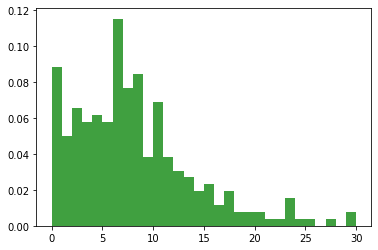

In [16]:
plt.hist(test, 30, density=True, facecolor='g', alpha=0.75)
plt.show()

As with the full corpus (`01-Terms.ipynb`), a hand inspection of the output above turned up a couple of interesting issues. For more details on the full corpus see `01-Terms-02-Parentheticals` for parentheticals mixed in with the text of the talks and `01-Terms-03-Numbers` for numbers feature in the talks regularly. 

There are also some interesting tokenization dimensions to a crowd-sourced transcription technology:

| Term    | Freq |
|:---------|---:|
|aa       |4 |
|aaaaa    |1  |
|aah      |3 |


Another caveat from the `01-Terms.ipynb` notebook: 
> The rest of the hand-examination turns up no other issues, so the basic vectorization built into `sklearn` appears to be satisfactory, with the only exception being its breaking of contractions at the apostrophe: e.g., *isn't* becomes *isn* and *'t*, with the latter being thrown away as too small -- which means that the indefinite article *a(n)* is also not present in the frequencies, but the definite article *the* remains. 

## Remove the non-words: 



In [17]:
trunc_df = raw_df.iloc[:,350:]
trunc_df.shape



(260, 20640)

In [18]:
# How many times does each work appear across the whole corpus of female talks? 
count_per_word = trunc_df.sum(axis = 0)

# How many talks does each word appear in?
talks_per_word = (trunc_df > 0).sum(axis = 0)

# How many words are in each talk? 
words_in_talk = trunc_df.sum(axis = 1)

# How many unique words per talk? 
unique_words_talk = (trunc_df > 0).sum(axis = 1)

In [19]:
print('count_per_word is',count_per_word.shape, '\n')
print('talks_per_word is',talks_per_word.shape, '\n')
print('words_in_talk is',words_in_talk.shape, '\n')
print('unique_words_talk is',unique_words_talk.shape, '\n')

count_per_word is (20640,) 

talks_per_word is (20640,) 

words_in_talk is (260,) 

unique_words_talk is (260,) 



#### Create a mask

We want to create a binary matrix of where the words are used: 

## What about the distribution of total counts?



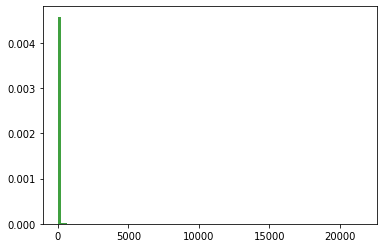

In [23]:
plt.hist(count_per_word, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

In [22]:
print('Smallest number of times a word is used is',count_per_word.min() ,
      'while the largest number of times is',count_per_word.max())
print('The average number of times a word is used is',round(count_per_word.mean(),2) ,
      'with a standard deviation of',round(count_per_word.std(),2),
      '\n The median is', count_per_word.median() )

Smallest number of times a word is used is 1 while the largest number of times is 21585
The average number of times a word is used is 22.79 with a standard deviation of 298.24 
 The median is 2.0


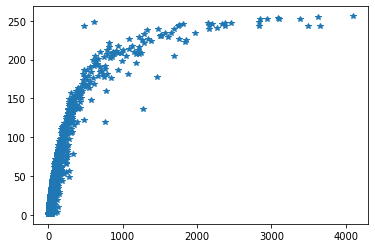

In [26]:
inds = count_per_word < 5000

plt.plot(count_per_word[inds],talks_per_word[inds],"*")

### Creating summary statistics

We're interested to know the statistics about word usage. That is, for the talks that a word is used in, what is the average usage and what the 

In [64]:
type(talks_per_word > 30)

pandas.core.series.Series

In [67]:
trunc_df.loc[:,talks_per_word > 30]

,ability,able,about,absolutely,access,across,act,actually,add,africa,...,yeah,year,years,yes,yet,york,you,young,your,yourself
0,0,0,8,0,0,1,0,4,1,0,...,1,0,2,0,2,5,26,1,6,0
1,2,2,16,0,0,0,0,2,0,0,...,4,3,3,9,1,1,50,1,9,0
2,1,5,28,1,2,5,0,6,0,1,...,1,4,4,4,3,2,59,0,3,0
3,0,2,2,1,0,0,0,3,1,0,...,0,1,0,2,0,0,37,0,9,0
4,0,0,1,0,0,0,0,7,0,0,...,0,0,3,0,0,0,5,0,2,0
5,1,2,11,0,0,0,0,9,1,0,...,1,6,5,0,0,0,58,0,0,0
6,1,5,45,0,1,0,0,1,2,0,...,0,3,4,0,0,0,50,0,7,0
7,0,0,28,1,0,0,1,7,0,1,...,0,3,19,1,1,4,28,0,10,0
8,2,0,12,0,0,0,0,3,0,2,...,0,2,13,2,0,1,88,0,5,1
9,1,3,15,0,0,1,0,7,0,1,...,0,3,2,0,2,0,28,1,2,0


In [69]:
ex_words = trunc_df[trunc_df.iloc[:,50] > 0].iloc[:,50]

ex_words

38     1
69     2
72     2
80     1
84     3
96     3
103    2
109    1
162    1
185    1
204    1
239    1
243    1
Name: abstract, dtype: int64

In [47]:
trunc_df.iloc[:,50] > 0



0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239     True
240    False
241    False
242    False
243     True
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
Name: abstract, Length: 260, dtype: bool

(20640,)


(array([1.01088270e+00, 1.27947872e-01, 3.36114216e-02, 1.51221862e-02,
        9.09694012e-03, 2.42191263e-03, 4.84382526e-03, 2.95355199e-03,
        2.30377055e-03, 1.94934431e-03, 2.00841535e-03, 5.90710397e-05,
        9.45136636e-04, 1.06327872e-03, 5.31639358e-04, 6.49781437e-04,
        1.18142079e-04, 3.54426238e-04, 3.54426238e-04, 1.18142079e-04,
        1.77213119e-04, 2.36284159e-04, 5.90710397e-05, 1.77213119e-04,
        1.18142079e-04, 0.00000000e+00, 5.90710397e-05, 0.00000000e+00,
        0.00000000e+00, 5.90710397e-05, 1.18142079e-04, 5.90710397e-05,
        0.00000000e+00, 1.18142079e-04, 0.00000000e+00, 5.90710397e-05,
        5.90710397e-05, 0.00000000e+00, 0.00000000e+00, 5.90710397e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.90710397e-05,
        5.90710397e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.90710397e-05, 1.181420

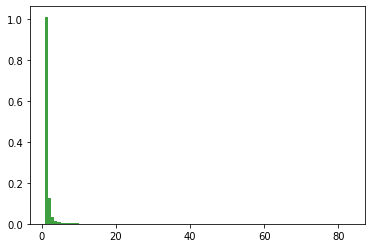

In [38]:
avg_counts = count_per_word/talks_per_word

print(avg_counts.shape)

plt.hist(avg_counts,100, density=True, facecolor='g', alpha=0.75)

# Distribution of words over the talks

Same as above but for number of talks that each work appears in. 

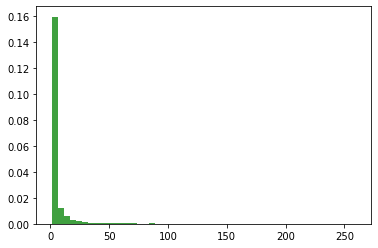

In [27]:
plt.hist(talks_per_word, 50, density=True, facecolor='g', alpha=0.75)
plt.show()


In [28]:
print('The fewest number of talks that a word is used in is',talks_per_word.min() ,
      'while the largest number of talks is',talks_per_word.max())
print('The average number of talks a word is appears in is',round(talks_per_word.mean(),2) ,
      'with a standard deviation of',round(talks_per_word.std(),2),
      '\n The median is', talks_per_word.median() )

The fewest number of talks that a word is used in is 1 while the largest number of talks is 260
The average number of talks a word is appears in is 7.08 with a standard deviation of 21.76 
 The median is 2.0


In [29]:
talks_per_word[talks_per_word >= 250].sort_values()

are     252
but     252
on      252
with    253
have    254
for     255
so      256
that    256
is      257
it      257
you     258
in      258
this    258
to      259
of      259
the     260
and     260
dtype: int64

In [30]:
#plot the distribution of talks per word
tpw_mat = np.vstack((np.array(range(20640)),talks_per_word.sort_values().to_numpy())).T

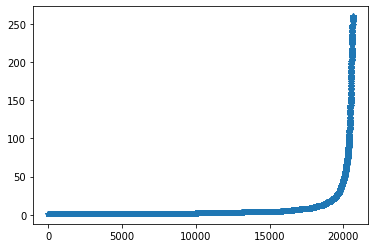

In [31]:
plt.plot(tpw_mat[:,0],tpw_mat[:,1],"*")

In [78]:
talks_per_word.sort_values().to_numpy().shape

(20640,)

In [69]:
tpw_mat[:5,:]

array([['aback', 1],
       ['abandoned', 8],
       ['abate', 1],
       ['abbreviated', 2],
       ['abbreviation', 1]], dtype=object)

### By talks



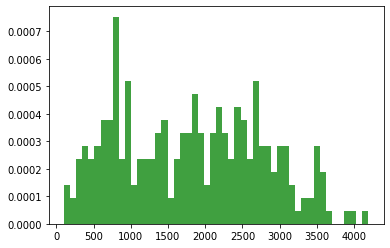

In [32]:
plt.hist(words_in_talk, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

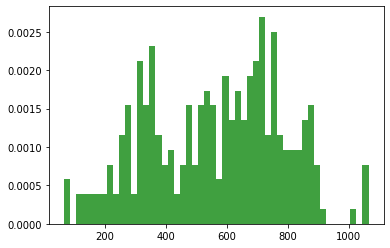

In [33]:
plt.hist(unique_words_talk, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

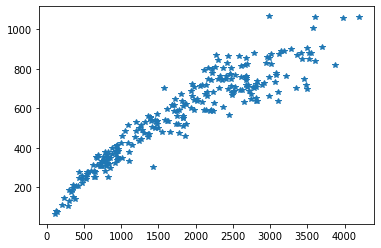

In [35]:
plt.plot(words_in_talk, unique_words_talk,"*")

## Remove words used only once

Based on statistics above, let's see that that looks like: 

In [30]:
more_than_once = count_per_word[count_per_word>1]

In [31]:
more_than_once.shape

(12508,)

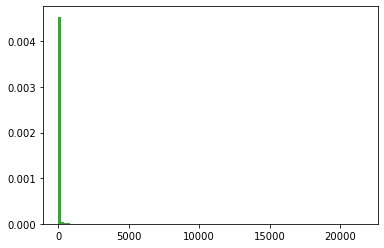

In [32]:
plt.hist(more_than_once, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

In [25]:
more_than_once.median()

5.0

In [26]:
more_than_once.sort_values()


zurich                  2
creditworthiness        2
neanderthals            2
nazi                    2
creepy                  2
                    ...  
that                10535
of                  12139
to                  14453
and                 17437
the                 21585
Length: 12508, dtype: int64

In [28]:
less_than_all = more_than_once[more_than_once<1000]

In [29]:
less_than_all.sort_values()

zurich          2
cribs           2
negotiates      2
crimean         2
needless        2
             ... 
world         936
here          938
then          971
get           975
don           985
Length: 12438, dtype: int64

In [30]:
less_than_all.head()

00       3
000    224
10     173
100     93
101      3
dtype: int64

In [32]:
less_than_all.value_counts(normalize=True)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

2      0.259206
3      0.144637
4      0.084901
5      0.069545
6      0.050490
         ...   
330    0.000080
314    0.000080
197    0.000080
282    0.000080
975    0.000080
Length: 338, dtype: float64

In [33]:
raw_series.value_counts(normalize=True)

1       0.404097
2       0.153597
3       0.085707
4       0.050310
5       0.041210
          ...   
311     0.000048
327     0.000048
375     0.000048
407     0.000048
1695    0.000048
Length: 409, dtype: float64

In [39]:
test = raw_series.value_counts(normalize=True)

In [54]:
count_mat = np.vstack((test.index.to_numpy(),test.to_numpy())).T

In [55]:
count_mat.shape

(409, 2)

In [57]:
count_mat[:5,:]

array([[1.        , 0.40409719],
       [2.        , 0.15359695],
       [3.        , 0.08570748],
       [4.        , 0.05030967],
       [5.        , 0.0412101 ]])

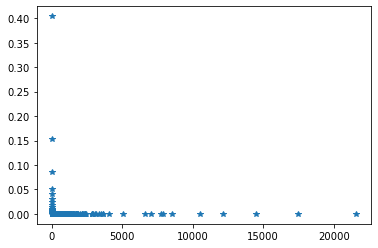

In [58]:
plt.plot(count_mat[:,0],count_mat[:,1],"*")

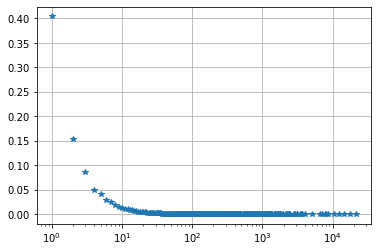

In [63]:
fig, ax = plt.subplots()


ax.semilogx(count_mat[:,0],count_mat[:,1], "*")
ax.grid()

plt.show()



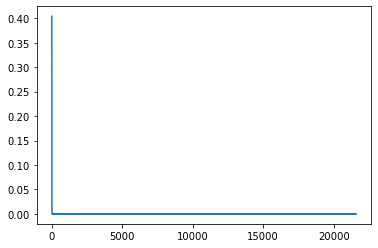

In [64]:
plt.plot(count_mat[:,0],count_mat[:,1],"-")

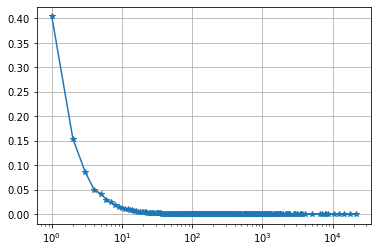

In [65]:
fig, ax = plt.subplots()


ax.semilogx(count_mat[:,0],count_mat[:,1], "*-")
ax.grid()

plt.show()

## Revised Frequencies without Parentheticals

For more on the work leading up to this regex, see the `01-Terms-02-Parentheticals` notebook: it contains a number of experiments, which were vexed by sklearn's vectorizer only accepting strings as inputs. (While gensim appears to accept texts as lists of words, we are hoping, I think, to keep our code base as simple as possible.) The eventual workaround is to clean the texts of the top 20 parentheticals, joining the list back to a string, and then pushing the result to sklearn. This is less than optimum, but the hack works and appears to be a hack performed elsewhere by others.

For now, the first thing we have is the list of the top 20 parentheticals, some of which are two words:

In [21]:
noparens_vec = CountVectorizer(preprocessor = remove_parentheticals)
noparens_X = noparens_vec.fit_transform(f_texts)
noparens_X.shape

(260, 20988)

Good news. Our removal parentheticals has only removed two words. 

In [22]:
noparens_df = pd.DataFrame(noparens_X.toarray(), columns = noparens_vec.get_feature_names())

In [23]:
term = 'laughter'
f"The baseline count for *{term}* is {raw_df[term].sum()}; \
with cleaning it is {noparens_df[term].sum()}"

'The baseline count for *laughter* is 1071; with cleaning it is 66'

## Frequencies of Terms with a 2-Document Minimum

Setting a `min_df = 2` removes all words that appear in only one document. (An exploration of *one document wonders* is elsewhere.) As we can see from the `shape` below, we dropped 20988 to 10805, resulting in a reduction of nearly half of the possible features.

In [25]:
min2_vec = CountVectorizer(preprocessor = remove_parentheticals, min_df = 2)
min2_X = min2_vec.fit_transform(f_texts)
min2_X.shape

(260, 10805)

As above we can sum our terms and write the results to a CSV file for closer inspection. Here, we highlight just a particular series of words.

In [26]:
# Create the dataframe
min2_df = pd.DataFrame(min2_X.toarray(), columns = min2_vec.get_feature_names())

# Create a series of sums
min2_series = min2_df.sum()

# Write sums to CSV:
# min2_series.to_csv('../output/word_freq_clean.csv')

# Inspect the sums
min2_series[1000:1005]

batteries     2
battery       9
battle       13
battles       5
bay           9
dtype: int64

## Frequencies of Terms Appearing in All Documents

Having trimmed terms that occur in only document from our feature set, we also need to determine what words occur across all the documents and thus are not particularly effective discriminators of topic. 

Note that this is a somewhat more dangerous move to make, since it has been shown that one of the keys to genre and gender in documents are the varying uses of so-called function words. In fact, as our explorations establish, using sklearn's built-in algorithms reveals a focus on removing common words does not really result in much of a reduction in the overall feature set, only 8 words occurring across 99% or more documents and that number only rising to 46 when we change the minimum threshold to 90%.

In [35]:
alldocs_vec = CountVectorizer(preprocessor = remove_parentheticals, min_df = 0.99)
alldocs_X = alldocs_vec.fit_transform(texts)
alldocs_X.shape

(260, 7)

In [36]:
alldocs_df = pd.DataFrame(alldocs_X.toarray(), columns = alldocs_vec.get_feature_names())
alldocs_series = alldocs_df.sum()
alldocs_series

and     17437
in       8529
of      12139
the     21585
this     5038
to      14453
you      7777
dtype: int64

In [37]:
mostdocs_vec = CountVectorizer(preprocessor = remove_parentheticals, min_df = 0.90)
mostdocs_X = mostdocs_vec.fit_transform(texts)
mostdocs_X.shape

(260, 41)

In [42]:
# mostdocs_df = pd.DataFrame(mostdocs_X.toarray(), columns = mostdocs_vec.get_feature_names())
# mostdocs_series = mostdocs_df.sum()
# mostdocs_series.head(46)

This last run simply verifies that the exploration above with `min_df` holds true when we switch to `max_df`. That is, that our exploration of the parameters were not asking something unexpected by the code and possibly generating inexplicable and undesirable results.

In [38]:
# tnt = topsntails
tnt_vec = CountVectorizer(preprocessor = remove_parentheticals, max_df = 0.9, min_df = 2)
tnt_X = tnt_vec.fit_transform(texts)
tnt_X.shape

(260, 10766)

The numbers add up. With that done, my recommendation is that we do not, for the time being, throw away common and/or function words: that is, let's not use a stopword list. Those words could be important in other ways, and dropping them has only a limited impact on the actual document-term matrix, one that pales by comparison to the words that occur only in one document.